In [18]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/shiva/Downloads/EDA2/EDA2/adult_with_headers.csv")

# Basic data exploration
print("Summary Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nData Types:")
print(data.dtypes)

# Handling missing values
# Let's assume "?" denotes missing values in this dataset
data.replace("?", pd.NA, inplace=True)
data.dropna(inplace=True)

# Scaling techniques
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard Scaling
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(data[['age', 'fnlwgt', 'education-num']])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data[['age', 'fnlwgt', 'education-num']])


Summary Statistics:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Missing Values:
age               0
workcl

KeyError: "['education-num'] not in index"

In [3]:
# Handling missing values
data.replace("?", pd.NA, inplace=True)
data.dropna(inplace=True)

# Renaming column "education-num" to "education_num"
data.rename(columns={"education-num": "education_num"}, inplace=True)

# Scaling techniques
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard Scaling
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(data[['age', 'fnlwgt', 'education_num']])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data[['age', 'fnlwgt', 'education_num']])


In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encoding for categorical variables with less than 5 categories
one_hot_cols = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() < 5]
encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_encoded = encoder.fit_transform(data[one_hot_cols])

# Label Encoding for categorical variables with more than 5 categories
label_cols = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() >= 5]
label_encoder = LabelEncoder()
for col in label_cols:
    data[col] = label_encoder.fit_transform(data[col])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
# Creating new features
data['total_capital'] = data['capital_gain'] + data['capital_loss']
data['work_hours_education_ratio'] = data['hours_per_week'] / data['education_num']

# Applying log transformation to a skewed numerical feature (e.g., capital_gain)
data['capital_gain_log'] = np.log1p(data['capital_gain'])



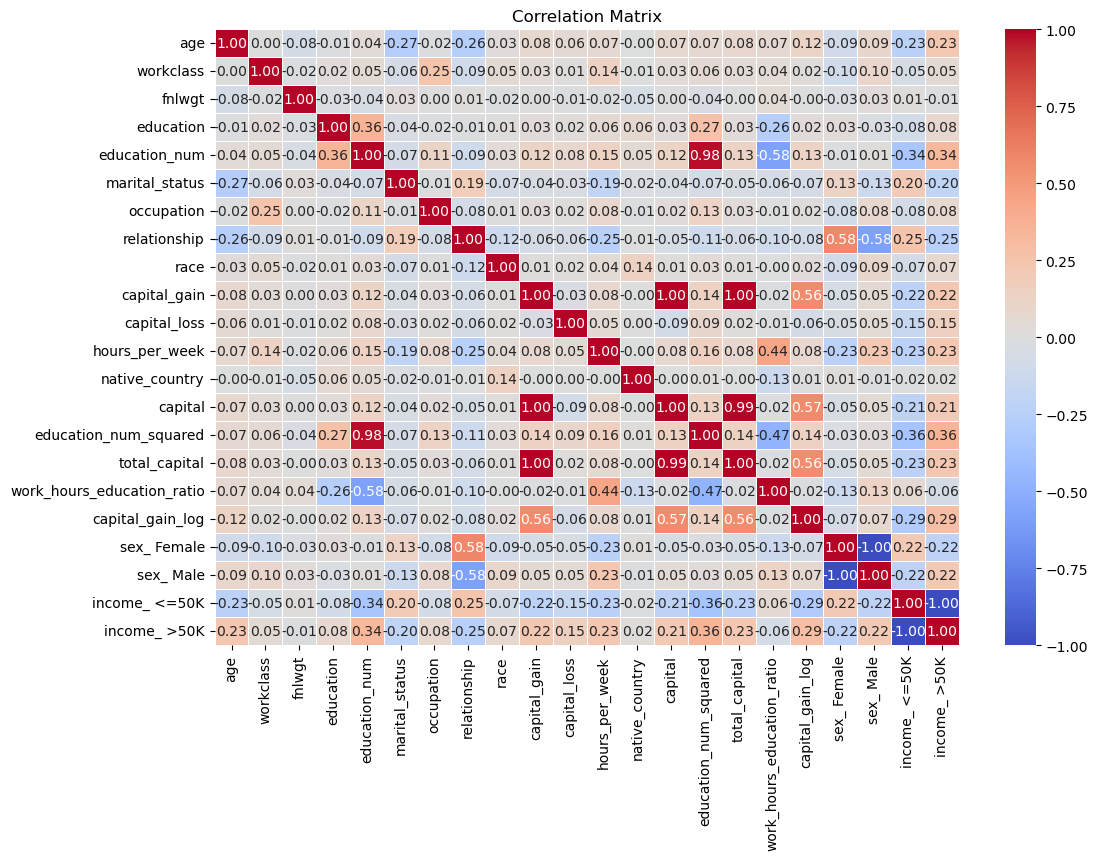

In [11]:
# One-hot encoding categorical variables
data_encoded = pd.get_dummies(data)

# Computing correlation matrix
correlation_matrix = data_encoded.corr()

# Visualizing correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [13]:
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Instantiate the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset

# Fit the model and predict outliers
outliers = iso_forest.fit_predict(numeric_data)

# Remove outliers
data_cleaned = data[outliers != -1]

# Discussion: Outliers can affect model performance by skewing the distribution of the data, leading to inaccurate model parameters and reduced generalization performance. Removing outliers can improve model robustness and accuracy.


In [16]:
import pandas
print(pandas.__version__)


2.0.3
